Acurácia do modelo: 0.70


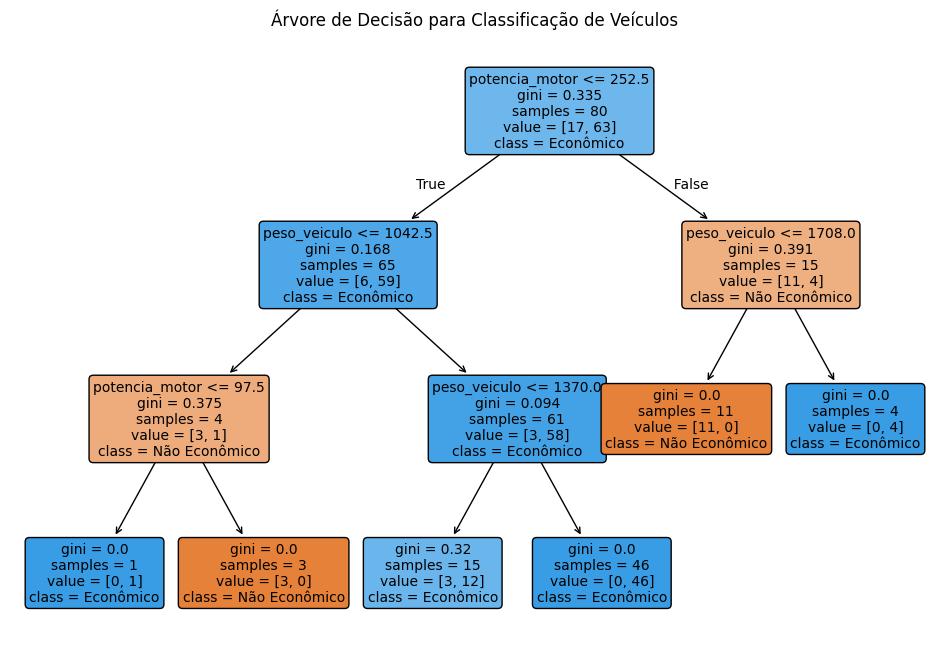


Dados utilizados para treinar o modelo:
    potencia_motor  peso_veiculo  classe
0              152          1001       0
1              229          1795       1
2              142          1069       1
3               64          1615       1
4              156          2094       1
5              121          1255       1
6              238          2285       1
7               70          2075       1
8              152          1816       1
9              171          1095       0
10             260          1519       0
11             264          1137       0
12             124          1678       1
13             252          1876       1
14             137          1591       1
15             166          1016       0
16             149          1563       1
17             153           987       0
18             201          1179       0
19             180          1292       1


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Passo 1: Gerar Dados Fictícios
np.random.seed(42)
n_samples = 100

# Potência do motor (entre 50 e 300 hp)
potencia_motor = np.random.randint(50, 300, n_samples)

# Peso do veículo (entre 800 e 2500 kg)
peso_veiculo = np.random.randint(800, 2500, n_samples)

# Classe: "Econômico" se potência/peso for maior que 0.15, senão "Não Econômico"
classe = np.where(potencia_motor / peso_veiculo > 0.15, "Econômico", "Não Econômico")

# Criando um DataFrame
data = pd.DataFrame({
    'potencia_motor': potencia_motor,
    'peso_veiculo': peso_veiculo,
    'classe': classe
})

# Passo 2: Treinar o Modelo de Árvore de Decisão
# Convertendo a classe para valores numéricos
le = LabelEncoder()
data['classe'] = le.fit_transform(data['classe'])

# Dividindo os dados em treino e teste
X = data[['potencia_motor', 'peso_veiculo']]
y = data['classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
accuracy = model.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Passo 3: Visualizar a Árvore de Decisão com matplotlib
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=['potencia_motor', 'peso_veiculo'],  
          class_names=['Não Econômico', 'Econômico'],  
          filled=True, rounded=True,  
          fontsize=10)
plt.title("Árvore de Decisão para Classificação de Veículos")
plt.show()

# Exibindo os dados utilizados para treinar o modelo
print("\nDados utilizados para treinar o modelo:")
print(data.head(20))